# WeatherPy
----

### Analysis
* The closer a city is to the equator the higher the  max temperature of the city is.
* Wind speed appears to slightly increase as we move away from the equator.
* There was no relationship between latitude and humidity, cloudiness and wind speed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create empty lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# call counter 
record = 1



# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop
for city in cities:  
    
    # Try statement to append calls
    try: 
        response = requests.get(f"{base_url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
      

        record= record + 1 
        
    # If no record found "skip" to next call
    except:
        print("Missing field/result... skipping.")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Tuktoyaktuk
Processing Record 2 | Roura
Missing field/result... skipping.
Processing Record 3 | Ushuaia
Missing field/result... skipping.
Processing Record 4 | Quimper
Processing Record 5 | Chokurdakh
Processing Record 6 | Busselton
Processing Record 7 | Khatanga
Processing Record 8 | Isangel
Processing Record 9 | Bambous Virieux
Processing Record 10 | Clyde River
Processing Record 11 | Dikson
Processing Record 12 | Cabo San Lucas
Processing Record 13 | Mindelo
Processing Record 14 | Sitka
Processing Record 15 | Albany
Processing Record 16 | Esperance
Processing Record 17 | Punta Arenas
Processing Record 18 | Novikovo
Processing Record 19 | Kapaa
Missing field/result... skipping.
Processing Record 20 | Hobart
Processing Record 21 | Marrakesh
Processing Record 22 | Siocon
Missing field/result... skipping.
Processing Record 23 | Ballina
Processing Record 24 | Rikitea
Processing Record 25 | Canby
Processing Rec

Processing Record 220 | Port Hardy
Processing Record 221 | Bredasdorp
Processing Record 222 | Makakilo City
Processing Record 223 | El Dorado
Processing Record 224 | Barao de Melgaco
Missing field/result... skipping.
Processing Record 225 | Tilichiki
Processing Record 226 | New Baltimore
Processing Record 227 | Ancud
Processing Record 228 | Lagoa
Missing field/result... skipping.
Processing Record 229 | Shangzhi
Processing Record 230 | Cairns
Missing field/result... skipping.
Processing Record 231 | Burnie
Missing field/result... skipping.
Processing Record 232 | Koulikoro
Missing field/result... skipping.
Processing Record 233 | Gubkinskiy
Processing Record 234 | Sao Joao da Barra
Processing Record 235 | Hambantota
Processing Record 236 | Kalabo
Processing Record 237 | Takaka
Processing Record 238 | Atasu
Processing Record 239 | Flinders
Processing Record 240 | Ndungu
Processing Record 241 | Wagar
Processing Record 242 | Vila Velha
Processing Record 243 | Cap-aux-Meules
Processing Rec

Processing Record 448 | Puerto Escondido
Processing Record 449 | Puerto Ayacucho
Processing Record 450 | Salinas
Processing Record 451 | Padang
Processing Record 452 | Ust-Ishim
Processing Record 453 | Buala
Processing Record 454 | Tuyen Quang
Processing Record 455 | Benghazi
Processing Record 456 | Potsdam
Processing Record 457 | Pychas
Processing Record 458 | Bullhead City
Processing Record 459 | Egvekinot
Processing Record 460 | Qinhuangdao
Processing Record 461 | Wajir
Processing Record 462 | Zhangjiakou
Processing Record 463 | Margate
Processing Record 464 | Srednekolymsk
Processing Record 465 | Varnavino
Processing Record 466 | Aswan
Missing field/result... skipping.
Processing Record 467 | Jaciara
Processing Record 468 | Biskamzha
Processing Record 469 | Zhangye
Processing Record 470 | Cockburn Town
Processing Record 471 | Albanel
Processing Record 472 | Bastia
Missing field/result... skipping.
Processing Record 473 | Havoysund
Processing Record 474 | Umm Kaddadah
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating dictionary
column_names = {"City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed}

In [6]:
# Creating Dataframe
weather_data = pd.DataFrame(column_names)

weather_data.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [7]:
# Saving to a CSV file
weather_data.to_csv('weatherdf_CSV.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tuktoyaktuk,90,CA,1539309600,92,69.44,-133.03,23.00,10.29
1,Roura,0,GF,1539309600,100,4.73,-52.33,77.00,5.82
2,Ushuaia,75,AR,1539309600,45,-54.81,-68.31,48.20,8.05
3,Quimper,75,FR,1539311400,93,48.00,-4.10,60.80,16.11
4,Chokurdakh,80,RU,1539312101,93,70.62,147.90,23.18,3.71


In [8]:
time.strftime("%Y-%m-%d")

'2018-10-11'

In [9]:
datetime.fromtimestamp(1539143760)

datetime.datetime(2018, 10, 9, 23, 56)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

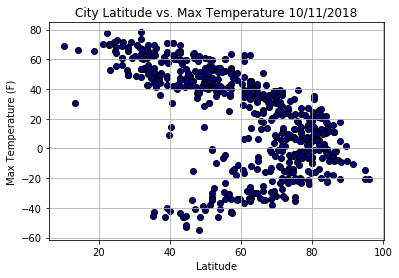

In [10]:
y_axis = weather_data['Max Temp']
x_axis = weather_data['Lat']


plt.scatter(y_axis, x_axis, c='navy', edgecolors='black', alpha=1)

plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.grid(True)

plt.savefig("Images/LatitudeVsMaxTemperature.png")

#### Latitude vs. Humidity Plot

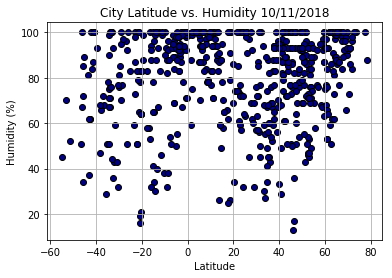

In [11]:
x_axis = weather_data['Lat']
y_axis = weather_data['Humidity']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Images/LatitudeVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

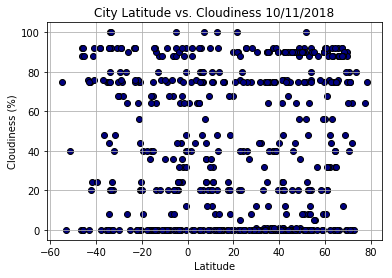

In [12]:
x_axis = weather_data['Lat']
y_axis = weather_data['Cloudiness']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title(f"City Latitude vs. Cloudiness {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Images/LatitudeVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

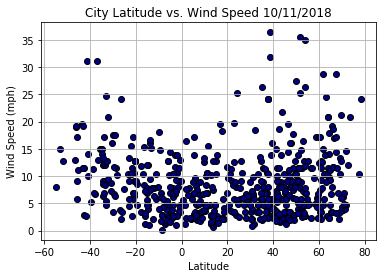

In [13]:
x_axis = weather_data['Lat']
y_axis = weather_data['Wind Speed']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Images/LatitudeVsWindSpeed.png")
plt.show()